In [19]:
from __future__ import print_function

import sys
sys.path.extend(['/home/jorg/repository/dcnn_acdc'])
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm


import copy

import numpy as np
import torch

from common.hvsmr.config import config_hvsmr
from in_out.hvsmr.load_data import HVSMR2016DataSet
from plotting.color_maps import transparent_cmap
from utils.hvsmr.batch_handler import HVSMRTwoDimBatchHandler
from utils.hvsmr.experiment import HVSMRExperiment as Experiment
from utils.hvsmr.exper_handler import HVSMRExperimentHandler as ExperimentHandler
from utils.hvsmr.test_handler import HVSMRTesthandler as TestHandler

from utils.hvsmr.exper_hdl_ensemble import ExperHandlerEnsemble
from utils.hvsmr.selective_classification import SelectiveClassification

mycmap = transparent_cmap(plt.get_cmap('jet'))
ROOT_DIR = "/home/jorg/repository/dcnn_acdc"
LOG_DIR = os.path.join(ROOT_DIR, "logs/HVSMR")

FOLD_ID = 0

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
dataset = HVSMR2016DataSet(config_hvsmr, search_mask=config_hvsmr.dflt_image_name + ".nii",
                               fold_id=FOLD_ID, preprocess="rescale",
                               debug=False, val_set_only=True)

In [2]:
test_handler = TestHandler(config_hvsmr, fold_id=FOLD_ID, use_cuda=True)

100%|██████████| 2/2 [00:00<00:00,  5.47it/s]


In [10]:
exp_mc01_brier = {3: "",
                  2: "",
                  1: "",
                  0: "20180919_23_03_53_dcnn_hvsmr_mc_f0p01_brier_10KE_lr1e03"}

exp_mc01_brier_path = os.path.join(LOG_DIR, exp_mc01_brier[FOLD_ID])

exper_hdl_mc01_brier = ExperimentHandler()
exper_hdl_mc01_brier.load_experiment(exp_mc01_brier_path, use_logfile=False)
exper_hdl_mc01_brier.set_root_dir(ROOT_DIR)
exper_hdl_mc01_brier.set_model_name("MC-dropout brier fold-{} (p={})".format(
                                exper_hdl_mc01_brier.exper.run_args.fold_ids[0],
                                exper_hdl_mc01_brier.exper.run_args.drop_prob))
print("Model name: {}".format(exper_hdl_mc01_brier.model_name))
print("-------------------------------------------------------------------------")

exper_hdl_ensemble = ExperHandlerEnsemble(exp_mc01_brier)

Load experiment from /home/jorg/repository/dcnn_acdc/logs/HVSMR/20180919_23_03_53_dcnn_hvsmr_mc_f0p01_brier_10KE_lr1e03/stats/exper_stats.dll
Model name: dcnn_hvsmr_mc p=0.10 fold=0 loss=brier
-------------------------------------------------------------------------
Load experiment from /home/jorg/repository/dcnn_acdc/logs/HVSMR/20180919_23_03_53_dcnn_hvsmr_mc_f0p01_brier_10KE_lr1e03/stats/exper_stats.dll


<function matplotlib.pyplot.show>

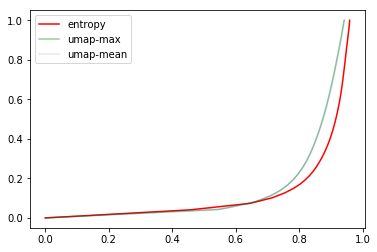

In [63]:
cov_risk_thresholds = sel_cls_handler.cov_risk_curv["patient010"]
cov_risk_thresholds_umap_max = sel_cls_handler_umap_max.cov_risk_curv["patient010"]
cov_risk_thresholds_umap_mean = sel_cls_handler_umap_mean.cov_risk_curv["patient010"]
coverage = []
risk = []
coverage_1 = []
risk_1 = []
coverage_2 = []
risk_2 = []

for threshold, res in cov_risk_thresholds.items():
    coverage.append(res[0])
    risk.append(res[1])
for threshold, res in cov_risk_thresholds_umap_max.items():
    coverage_1.append(res[0])
    risk_1.append(res[1])
for threshold, res in cov_risk_thresholds_umap_mean.items():
    coverage_2.append(res[0])
    risk_2.append(res[1])
coverage = np.array(coverage)
risk = np.array(risk)
coverage_1 = np.array(coverage_1)
risk_1 = np.array(risk_1)
coverage_2 = np.array(coverage_2)
risk_2 = np.array(risk_2)
plt.plot(coverage, risk, "r", label="entropy")
plt.plot(coverage_1, risk_1, "g", alpha=0.4, label="umap-max")
plt.plot(coverage_2, risk_2, "b", alpha=0.1, label="umap-mean")
plt.legend(loc="best")
plt.show

In [57]:
sel_cls_handler_umap_mean = SelectiveClassification(exper_hdl_ensemble, type_of_map="umap", aggregate_func="mean")
sel_cls_handler_umap_mean()

Patient patient009
WARNING - No predicted labels found for this patient. Skipping
Patient patient010
INFO - Applying threshold 0.0000
INFO - Applying threshold 0.0090
INFO - Applying threshold 0.0181
INFO - Applying threshold 0.0271
INFO - Applying threshold 0.0362
INFO - Applying threshold 0.0452
INFO - Applying threshold 0.0542
INFO - Applying threshold 0.0633
INFO - Applying threshold 0.0723
INFO - Applying threshold 0.0814
INFO - Applying threshold 0.0904
INFO - Applying threshold 0.0995
INFO - Applying threshold 0.1085
INFO - Applying threshold 0.1175
INFO - Applying threshold 0.1266
INFO - Applying threshold 0.1356
INFO - Applying threshold 0.1447
INFO - Applying threshold 0.1537
INFO - Applying threshold 0.1627
INFO - Applying threshold 0.1718
INFO - Applying threshold 0.1808
INFO - Applying threshold 0.1899
INFO - Applying threshold 0.1989
INFO - Applying threshold 0.2080
INFO - Applying threshold 0.2170
INFO - Applying threshold 0.2260
INFO - Applying threshold 0.2351
INFO - A

In [45]:
sel_cls_handler = SelectiveClassification(exper_hdl_ensemble, type_of_map="emap")
sel_cls_handler()

Patient patient009
WARNING - No predicted labels found for this patient. Skipping
Patient patient010
INFO - Applying threshold 0.0000
INFO - Applying threshold 0.0103
INFO - Applying threshold 0.0205
INFO - Applying threshold 0.0308
INFO - Applying threshold 0.0410
INFO - Applying threshold 0.0513
INFO - Applying threshold 0.0615
INFO - Applying threshold 0.0718
INFO - Applying threshold 0.0821
INFO - Applying threshold 0.0923
INFO - Applying threshold 0.1026
INFO - Applying threshold 0.1128
INFO - Applying threshold 0.1231
INFO - Applying threshold 0.1333
INFO - Applying threshold 0.1436
INFO - Applying threshold 0.1538
INFO - Applying threshold 0.1641
INFO - Applying threshold 0.1744
INFO - Applying threshold 0.1846
INFO - Applying threshold 0.1949
INFO - Applying threshold 0.2051
INFO - Applying threshold 0.2154
INFO - Applying threshold 0.2256
INFO - Applying threshold 0.2359
INFO - Applying threshold 0.2462
INFO - Applying threshold 0.2564
INFO - Applying threshold 0.2667
INFO - A

In [23]:
exper_hdl_mc01_brier.test_set = None
exper_hdl_mc01_brier.test(10000, image_num=1, mc_samples=10, sample_weights=True, 
                          compute_hd=False, store_details=False, do_filter=True, save_pred_labels=True,
                          store_test_results=False, save_umaps=True)

100%|██████████| 2/2 [00:00<00:00,  5.64it/s]


Image 2-patient010 - test loss 1901.622  dice(RV/Myo/LV):	 0.76/0.89	


In [ ]:
exper_hdl_mc01_brier.create_agg_bayes_umap(patient_id="patient010", aggregate_func="max")

INFO - Successfully saved fig /home/jorg/repository/dcnn_acdc/logs/HVSMR/20180919_23_03_53_dcnn_hvsmr_mc_f0p01_brier_10KE_lr1e03/figures/patient010/patient010_emap_s76_82.pdf


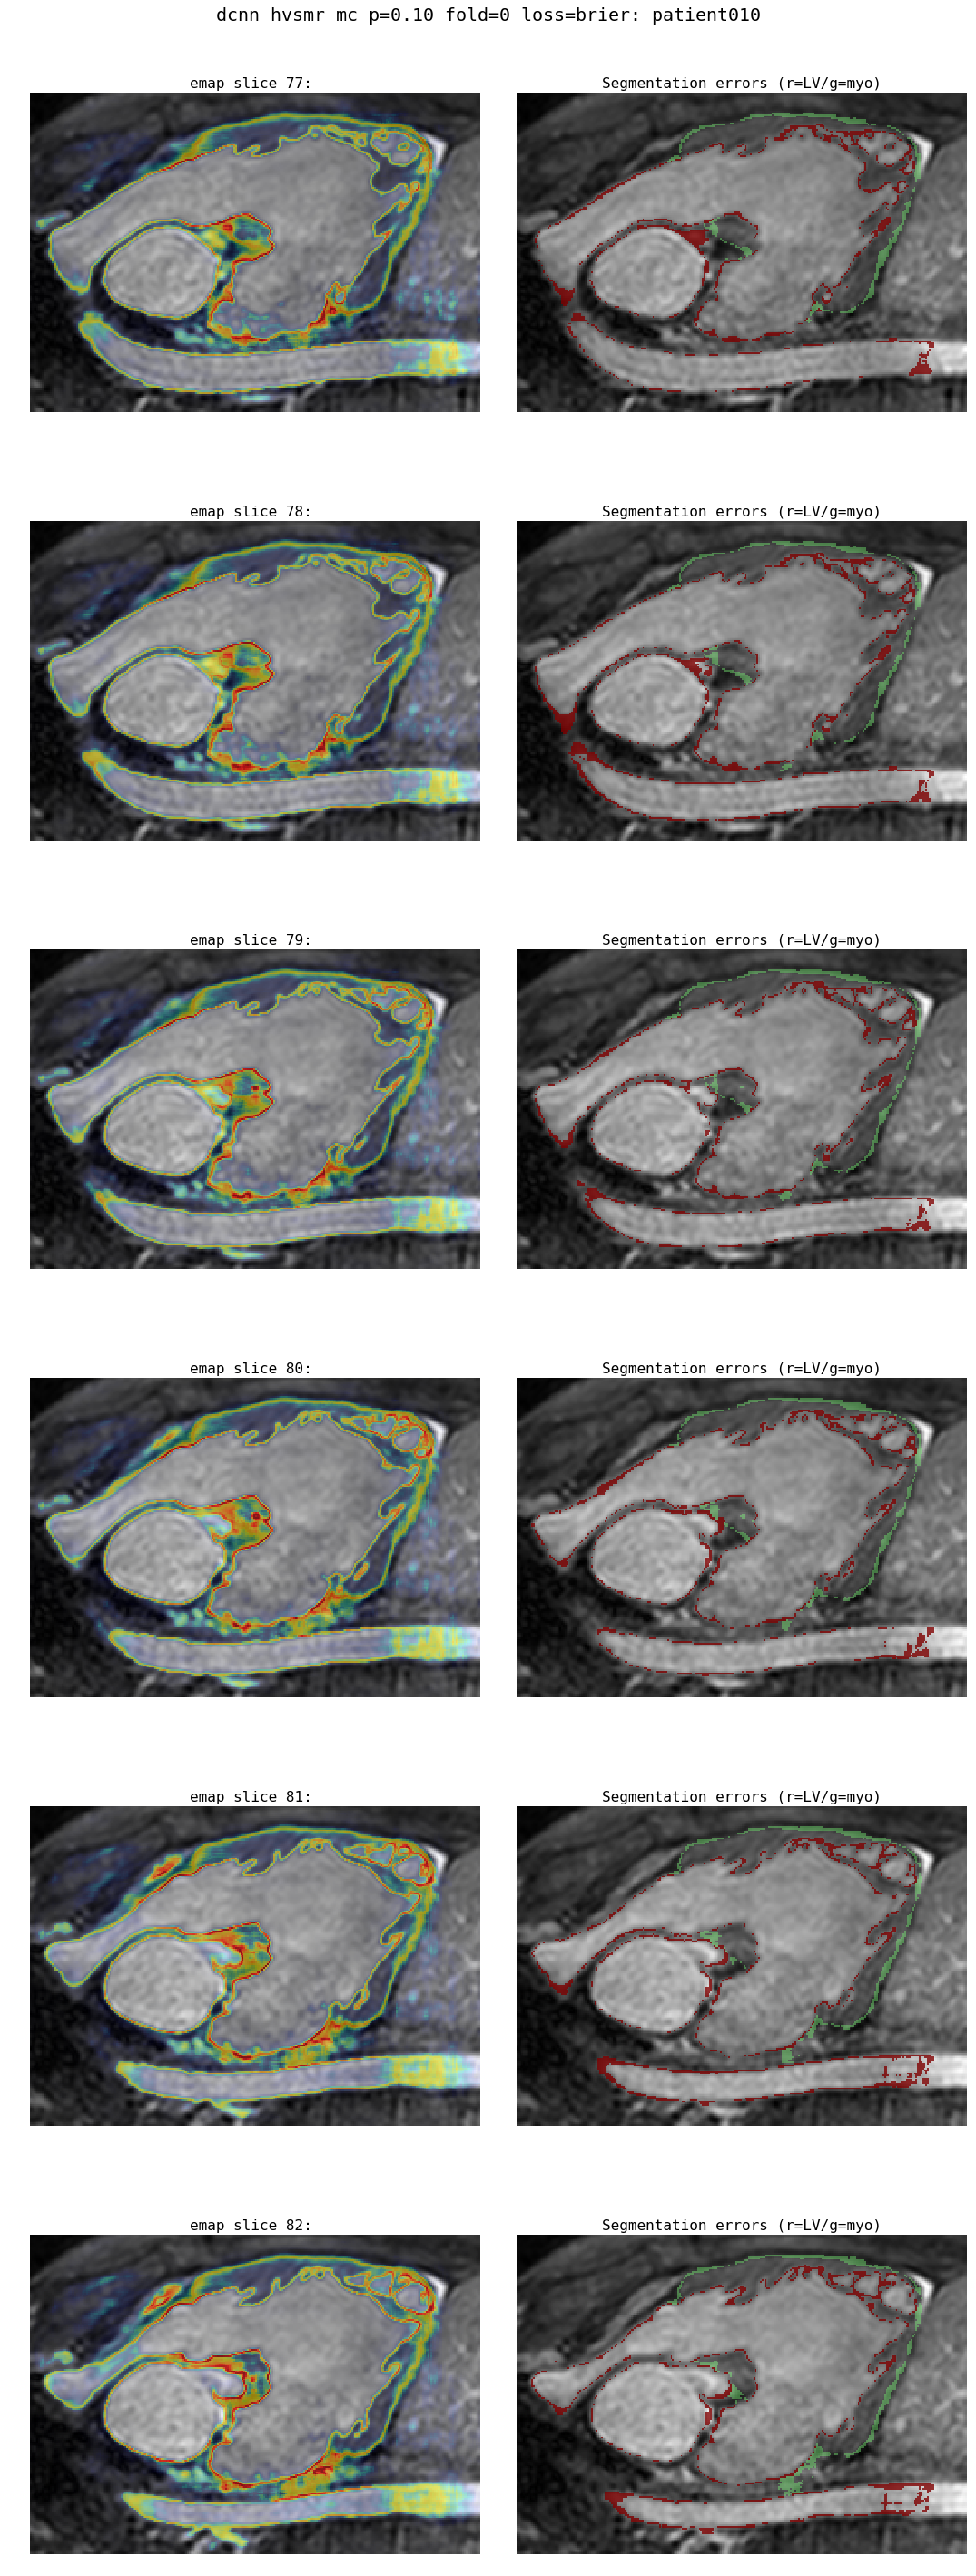

In [43]:
from plotting.entropy_map_plots import plot_slices

plot_slices(exper_hdl_mc01_brier, patient_id="patient010", do_show=True,
                             slice_range=[76, 82], type_of_map="emap", aggregate_func="mean",
                             do_save=True)